In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import scipy.cluster.hierarchy as sac
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Taking features - pH and Alcohol

In [3]:
data1 = data.iloc[:200,[8,10]].values

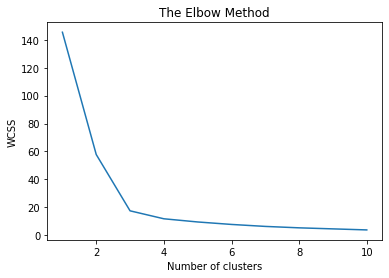

In [4]:
from sklearn.cluster import KMeans
wcss = [] #WCSS is the sum of squared distance between each point and the centroid in a cluster.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # creating clusters of different numbers
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'alcohol')

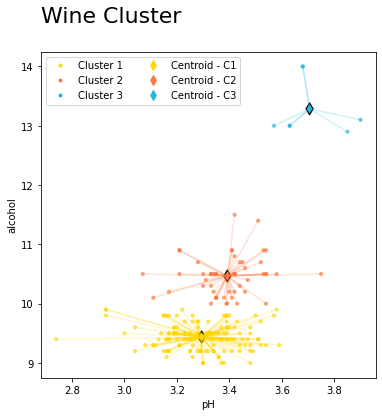

In [5]:
df = data.copy()
df = df[:200]
# k means
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 42)
df['cluster'] = kmeans.fit_predict(df[['pH','alcohol']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['gold', '#fc763d','#20b9df']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig, ax = plt.subplots(1, figsize=(6,6))
# plot data
plt.scatter(df.pH, df.alcohol, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='d', c=colors, s=70,edgecolor='black', linewidth=1.2)
# plot lines
for idx, val in df.iterrows():
    x = [val.pH, val.cen_x,]
    y = [val.alcohol, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
cent_leg = [Line2D([0], [0], marker='d', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper left', ncol=2)
plt.title('Wine Cluster\n', loc='left', fontsize=22)
plt.xlabel('pH')
plt.ylabel('alcohol')

#### Agglomerative Hierarchical Cluster

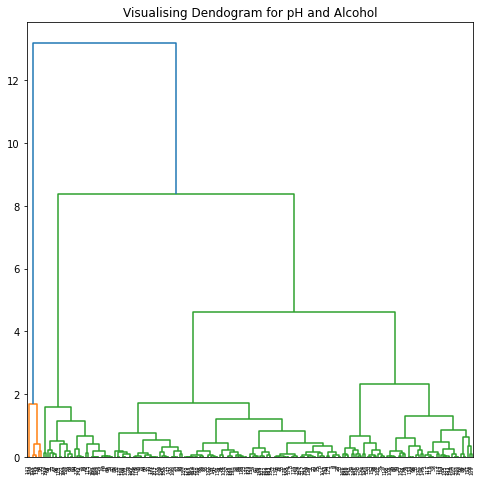

In [6]:
plt.figure(figsize =(8, 8))
plt.title('Visualising Dendogram for pH and Alcohol')
Dendrogram = sac.dendrogram((sac.linkage(data1, method ='ward')))

## Taking features - total sulfur dioxide and chlorides

In [7]:
data2 = data.iloc[:200,[6,4]].values

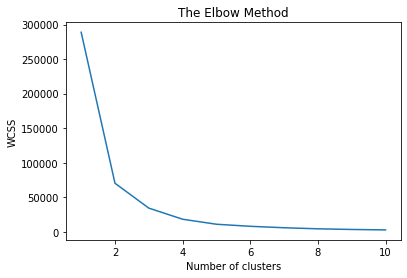

In [8]:
wcss = [] #
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # creating clusters of different numbers
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'chlorides')

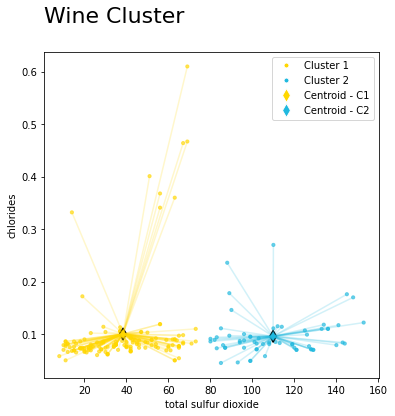

In [9]:
data.rename({'total sulfur dioxide': 'total_sulfur_dioxide'}, axis=1, inplace=True)
df1 = data.copy()
df1 = df1[:200]
# k means
kmeans1 = KMeans(n_clusters=2, init = 'k-means++', random_state = 42)
df1['cluster'] = kmeans1.fit_predict(df1[['total_sulfur_dioxide','chlorides']])
# get centroids
centroids1 = kmeans1.cluster_centers_
cen_x = [i[0] for i in centroids1] 
cen_y = [i[1] for i in centroids1]
## add to df
df1['cen_x'] = df1.cluster.map({0:cen_x[0], 1:cen_x[1]})
df1['cen_y'] = df1.cluster.map({0:cen_y[0], 1:cen_y[1]})
# define and map colors
colors = ['gold','#20b9df']
df1['c'] = df1.cluster.map({0:colors[0], 1:colors[1]})
fig, ax = plt.subplots(1, figsize=(6,6))
# plot data
plt.scatter(df1.total_sulfur_dioxide, df1.chlorides, c=df1.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='d', c=colors, s=70,edgecolor='black', linewidth=1.2)
# plot lines
for idx, val in df1.iterrows():
    x = [val.total_sulfur_dioxide, val.cen_x,]
    y = [val.chlorides, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
cent_leg = [Line2D([0], [0], marker='d', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=1)
plt.title('Wine Cluster\n', loc='left', fontsize=22)
plt.xlabel('total sulfur dioxide')
plt.ylabel('chlorides')

#### Agglomerative Hierarchical Cluster

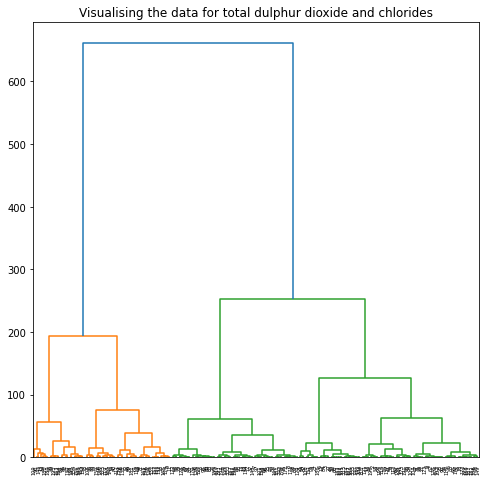

In [10]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data for total dulphur dioxide and chlorides')
Dendrogram = sac.dendrogram((sac.linkage(data2, method ='ward')))